### Machine Learning Prerequisite Test
by Soumyaratna Debnath, 22270004

<hr>

#### Question 1
**How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**


Let us consider two matrics A and B such that

$
A = {\begin{bmatrix}
a & b & c\\
d & e & f
\end{bmatrix}}_{2\times 3}
$

$B = {\begin{bmatrix}
g & h\\
i & j\\
k & l
\end{bmatrix}}_{3\times 2}
$

The matrix obtained by the product of the two matrics (say P) will be of dimension $2 \times 2$ where each element of P[i, j] would be a result of 3 multiplactions and 2 additions. That is,

$
P = {\begin{bmatrix}
ag+bi+ck & ah+bj+cl\\
dg+ei+fk & dh+ej+fl
\end{bmatrix}}_{2\times 2}
$

The total number of multiplications = 3 x (2 x 2)
and total number of additions = 2 x (2 x 2)

For matrics of dimenstions (n, k) and (k, m), the resulttant matrix will have dimension (n, m). 

And the **total number of multiplcations will be (k $\times$ n $\times$ m)** and **total number of additions will be ((k-1) $\times$ n $\times$ m)** 

<hr>

#### Question 2
**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [3]:
# defining the value of N, K and M
N = 112
K = 141
M = 103

In [4]:
# usual matrix multiplication routine using loops
def muliplyMatrix(A, B):
  R = [[0]*len(B[0]) for x in range(len(A))]
  for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)): R[i][j] += A[i][k] * B[k][j]
  return R

In [10]:
import random

# initializing two matrics using list of lists
A1 = [[random.randint(10, 99)]*K]*N
B1 = [[random.randint(10, 99)]*M]*K

In [11]:
# obtaining the time elapsed
%timeit res1 = muliplyMatrix(A1, B1)

445 ms ± 4.16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
import numpy

In [13]:
# initializaing two matrics using numpy
A2 = numpy.ones((N, K))*numpy.random.randint(10,99)
B2 = numpy.ones((K, M))*numpy.random.randint(10,99)

In [14]:
# obtaining the time elapsed using numpy.matmul function
%timeit res2 = numpy.matmul(A2, B2)

174 µs ± 3.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


The reason for the drastic differene in CPU time is because a Python list can have different data-types, which puts lots of extra constraints while doing computation on it. Numpy array on the other hand is a collection of similar data-types that are densely packed in memory, thus, the operations are faster in the later case.

<hr>

#### Question 4
**What is the gradient of the following function with respect to x and y?**
$$x^2y + y^3\sin(x)$$

The gradient of the given equation with respect to $x$ is 
$$2xy + y^3 cos (x)$$

And with respect to $y$ is
$$x^2 + 3y^2sin(x)$$

<hr>

#### Question 5
Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [15]:
import math

# the function returns the gradient of the given equation wrt x
def grad_A_X(x, y):
  return 2*x*y + (y**3)*math.cos(x)

# the function returns the gradient of the given equation wrt y
def grad_A_Y(x, y):
  return x**2 + 3*(y**2)*math.sin(x)

In [16]:
import jax.numpy as jnp
from jax import grad  

# defining the original function
def func(x, y):
    return (x**2) * y + (y**3) * jnp.sin(x)

# gradient wrt x using JAX
grad_J_X = grad(func, argnums = 0)

#gradient wrt y using JAX
grad_J_Y = grad(func, argnums = 1)

In [17]:
import numpy

# randomly generating x and y
x = numpy.random.random(5)
y = numpy.random.random(5)

# evaluation 
for (i, j) in zip(x, y):
  A = grad_A_X(i, j)
  J = grad_J_X(i, j)
  print('Gradient wrt X : Analytical = {0} \t\t JAX = {1} \t\t Difference = {2}'.format(A, J, abs(A-J)))

print('')

for (i, j) in zip(x, y):
  A = grad_A_Y(i, j)
  J = grad_J_Y(i, j)
  print('Gradient wrt Y : Analytical = {0} \t\t JAX = {1} \t\t Difference = {2}'.format(A, J, abs(A-J)))

Gradient wrt X : Analytical = 0.724331593149686 		 JAX = 0.7243315577507019 		 Difference = 5.960464477539063e-08
Gradient wrt X : Analytical = 0.3566246183112793 		 JAX = 0.35662463307380676 		 Difference = 0.0
Gradient wrt X : Analytical = 0.17755654082930905 		 JAX = 0.17755651473999023 		 Difference = 2.9802322387695312e-08
Gradient wrt X : Analytical = 0.12364877509690367 		 JAX = 0.12364877760410309 		 Difference = 0.0
Gradient wrt X : Analytical = 0.06744545455239598 		 JAX = 0.06744545698165894 		 Difference = 0.0

Gradient wrt Y : Analytical = 0.1335834818557851 		 JAX = 0.13358348608016968 		 Difference = 0.0
Gradient wrt Y : Analytical = 0.9557789336357421 		 JAX = 0.955778956413269 		 Difference = 0.0
Gradient wrt Y : Analytical = 0.15356210305796697 		 JAX = 0.15356209874153137 		 Difference = 0.0
Gradient wrt Y : Analytical = 0.6704491289517531 		 JAX = 0.6704491376876831 		 Difference = 0.0
Gradient wrt Y : Analytical = 0.3004465538464598 		 JAX = 0.3004465401172638 		 D

The results obtained through JAX matches to that obtained analytically

<hr>

#### Question 6
**Use sympy to confirm that you obtain the same gradient analytically.**

In [18]:
from sympy import symbols, expand, diff, sin
x, y = symbols('x y')
expression = (x**2) * y + (y**3) * sin(x)
 
# gradient wrt x
grad_X = diff(expression, x)

# gradient wrt y
grad_Y = diff(expression, y)

# evaluation  
print('Given Equation :', expression)
print('Gradient wrt X :', grad_X)
print('Gradient wrt Y :', grad_Y) 

Given Equation : x**2*y + y**3*sin(x)
Gradient wrt X : 2*x*y + y**3*cos(x)
Gradient wrt Y : x**2 + 3*y**2*sin(x)


The result obtained using sympy is identical to that obtained analytically.

<hr>

#### Question 7

**Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks.**

In [19]:
Students = {}

# creating year 2022
Students['2022'] = {}
# creating Branch 1 for 2022
Students['2022']['Branch 1'] = {}
# creating Student 1 for Branch 1 of 2022
Students['2022']['Branch 1']['Student 1'] = {}
# adding data to student
Students['2022']['Branch 1']['Student 1']['Roll No'] = 1
Students['2022']['Branch 1']['Student 1']['Name'] = 'TestName1'
Students['2022']['Branch 1']['Student 1']['Marks'] = {}
Students['2022']['Branch 1']['Student 1']['Marks']['Maths'] = 100
Students['2022']['Branch 1']['Student 1']['Marks']['English'] = 70

Students['2022']['Branch 1']['Student 2'] = {}
Students['2022']['Branch 1']['Student 2']['Roll No'] = 2
Students['2022']['Branch 1']['Student 2']['Name'] = 'TestName2'
Students['2022']['Branch 1']['Student 2']['Marks'] = {}
Students['2022']['Branch 1']['Student 2']['Marks']['Maths'] = 70
Students['2022']['Branch 1']['Student 2']['Marks']['English'] = 100

Students['2022']['Branch 2'] = {}

Students['2023'] = {}
Students['2023']['Branch 1'] = {}
Students['2023']['Branch 2'] = {}

In [21]:
# presenting the data hierarchically
for batch in Students:
  for branch in Students[batch]:
    for student in Students[batch][branch]:
      print('Year={0}  Branch={1}  Details={2}'.format(batch, branch, Students[batch][branch][student]))

Year=2022  Branch=Branch 1  Details={'Roll No': 1, 'Name': 'TestName1', 'Marks': {'Maths': 100, 'English': 70}}
Year=2022  Branch=Branch 1  Details={'Roll No': 2, 'Name': 'TestName2', 'Marks': {'Maths': 70, 'English': 100}}


<hr>

#### Question 8

**Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [23]:
class Score:
  def __init__(self, a, b):
    self.Maths = a
    self.English = b

  def show(self):
    return '[Maths = ' + str(self.Maths) + ' English = ' + str(self.English) +']'

class Student:
  def __init__(self, r = None, n = None, a = 0, b = 0):
    self.RollNo = r
    self.Name = n
    self.Marks = Score(a, b)

  def show(self):
    print('Roll No = {0}, Name = {1}, Marks = {2}'.format(self.RollNo, self.Name, self.Marks.show()))

class Branch:
  def __init__(self, branch = 'NA', students = []):
    self.branch = branch
    self.students = students
  
  def show(self):
    print('Branch =', self.branch)
    for items in self.students:
      items.show()
    print('')

class Year:
  def __init__(self, year = 2022, branches = []):
    self.year = year
    self.branches = branches

  def show(self):
    print('Year =', self.year, end = '\n\n')
    for items in self.branches:
      items.show()
    print('-------------------------------')

class Students:
  def __init__(self, years = []):
    self.years = years

  def show(self):
    for items in self.years:
      items.show()

In [24]:
# creating a sample database with years 2022 and 2023, each year having two Branches
Database1 = Students([Year(2022, [Branch('Branch 1', [Student(1, 'Name1', 70, 100), Student(2, 'Name2', 100, 70)]), Branch('Branch 2')]), 
                      Year(2023, [Branch('Branch 1'), Branch('Branch 2')])])

In [61]:
# presenting the data hierarchically
Database1.show()

Year = 2022

Branch = Branch 1
Roll No = 1, Name = Name1, Marks = [Maths = 70 English = 100]
Roll No = 2, Name = Name2, Marks = [Maths = 100 English = 70]

Branch = Branch 2

-------------------------------
Year = 2023

Branch = Branch 1

Branch = Branch 2

-------------------------------


<hr>

#### Question 9
**Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

$
y = x \\
y = x^2 \\
y = \frac{x^3}{100} \\
y = sin(x) \\
y = \frac{sin(x)}{x} \\
y = log(x) \\
y = e^x
$

In [25]:
import math

# defining the functions as f1 through f7
def f1(x):
  return x

def f2(x):
  return x**2

def f3(x):
  return (x**3)/100

def f4(x):
  return math.sin(x)

def f5(x):
  return math.sin(x)/x

def f6(x):
  return math.log(x)

def f7(x):
  return math.e**x

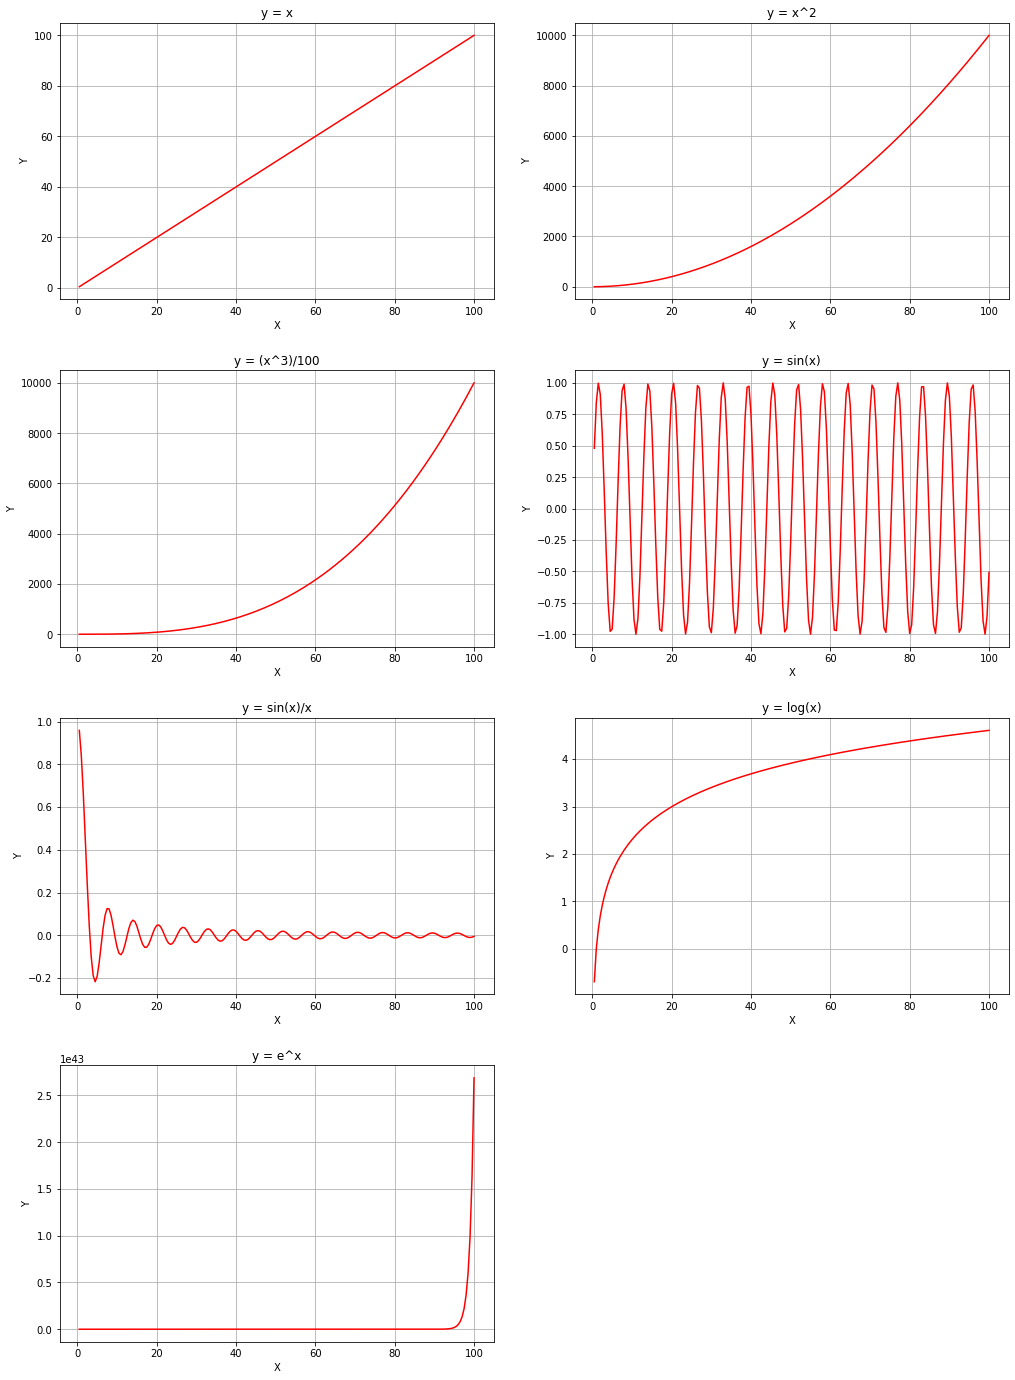

In [27]:
import matplotlib.pyplot as plt
import numpy

# creating an array of x coordinates, from 0.5 to 100, with a step of 0.5
x_corr = numpy.arange(0.5, 100.5, 0.5)

# creating 4x2 = 8 subplots
fig, ax = plt.subplots(4, 2, figsize=(15, 20))
fig.tight_layout(pad=5.0) # adding pad between the subplots

ax[0, 0].set_title('y = x') # title of the subplot
ax[0, 0].set_xlabel('X')    # xlabel for the subplot
ax[0, 0].set_ylabel('Y')    # ylabel for the subplot
ax[0, 0].grid()             # adding the grid
ax[0, 0].plot(x_corr, [f1(c) for c in x_corr], color = 'red') # producing the curve in red

ax[0, 1].set_title('y = x^2')
ax[0, 1].set_xlabel('X')
ax[0, 1].set_ylabel('Y')
ax[0, 1].grid()
ax[0, 1].plot(x_corr, [f2(c) for c in x_corr], color = 'red')

ax[1, 0].set_title('y = (x^3)/100')
ax[1, 0].set_xlabel('X')
ax[1, 0].set_ylabel('Y')
ax[1, 0].grid()
ax[1, 0].plot(x_corr, [f3(c) for c in x_corr], color = 'red')

ax[1, 1].set_title('y = sin(x)')
ax[1, 1].set_xlabel('X')
ax[1, 1].set_ylabel('Y')
ax[1, 1].grid()
ax[1, 1].plot(x_corr, [f4(c) for c in x_corr], color = 'red')

ax[2, 0].set_title('y = sin(x)/x')
ax[2, 0].set_xlabel('X')
ax[2, 0].set_ylabel('Y')
ax[2, 0].grid()
ax[2, 0].plot(x_corr, [f5(c) for c in x_corr], color = 'red')

ax[2, 1].set_title('y = log(x)')
ax[2, 1].set_xlabel('X')
ax[2, 1].set_ylabel('Y')
ax[2, 1].grid()
ax[2, 1].plot(x_corr, [f6(c) for c in x_corr], color = 'red')

ax[3, 0].set_title('y = e^x')
ax[3, 0].set_xlabel('X')
ax[3, 0].set_ylabel('Y')
ax[3, 0].grid()
ax[3, 0].plot(x_corr, [f7(c) for c in x_corr], color = 'red')

ax[3, 1].axis('off')

plt.show()